In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt

In [2]:
def significant_corr(df1,df2,a,b):
  import scipy.stats as stats
  if df2.empty:
    df2=df1
  r = stats.pearsonr(df1[a], df2[b])
  if r[1] < 0.1:
    return (True,r[0])
  else:
    return (False,0)

def print_significant_corr(df1,df2,a,b):
  import scipy.stats as stats
  if df2.empty:
    df2=df1
  r = stats.pearsonr(df1[a], df2[b])
  if r[1] < 0.1:
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    print('*Statistically significant*')
    print('***********************************************')

In [3]:
ieco_grf_df=pd.read_csv('iEco_&_graph.csv')
ieco_df=pd.read_csv('iEco.csv')
ieco_df_copy=pd.read_csv('iEco(copy).csv')
grf_df=pd.read_csv('../Tidy_DataFrame.csv')
grf_sin_islas_nd=pd.read_csv('../Gephi_sin_islas/CABA sin islas nodes.csv')
full_ieco_df=pd.read_csv('full_iEco.csv')

ieco_grf_df=pd.concat([ieco_grf_df,grf_df],axis=1)
ieco_grf_df = ieco_grf_df.loc[:,~ieco_grf_df.columns.duplicated()]
full_ieco_df=full_ieco_df.rename({0:1,1:0,5:3,3:5},axis='index')
full_ieco_grf_df=pd.concat([full_ieco_df,grf_df],axis=1)


In [4]:
ieco_df

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact
0,1,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,3.430,3.233333,2.93,1.985455
1,0,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,3.175,2.611667,2.58,2.094545
2,2,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,3.205,4.121667,3.11,2.375455
3,5,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,3.460,3.228333,2.74,2.088182
4,4,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,3.365,2.910000,2.84,2.270000
5,3,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,2.740,2.613333,2.48,2.257879


In [5]:
ieco_df_copy

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Impact
0,México,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,3.430,3.233333,2.93,1.985455
1,Argentina,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,3.175,2.611667,2.58,2.094545
2,Chile,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,3.205,4.121667,3.11,2.375455
3,Brasil,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,3.460,3.228333,2.74,2.088182
4,España,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,3.365,2.910000,2.84,2.270000
5,Uruguay,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,2.740,2.613333,2.48,2.257879


In [6]:
grf_df

,Ciudad,País,avg strength,weight,Degree,Weighted Degree,Eccentricidad,Clustering,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Rich Club Coefficient,Core Ratio,Central Point Dominance,Spectral radius
0,CABA,Argentina,3.244633,1.481579,4.385965,14.017544,4.798246,0.148791,6,3,3.355669,0.107392,0.325773,0.960807,5.333333,0.495614,0.251,1.868
1,CDMX,México,3.477388,1.388629,3.658863,12.963211,5.622074,0.075940,7,4,3.820318,0.050000,0.289320,0.677149,1.000000,0.421405,0.202,1.910
2,Santiago de Chile,Chile,3.417211,1.462564,3.948718,13.764103,5.041026,0.134037,6,3,3.227544,0.100744,0.338889,0.906814,19.000000,0.430769,0.525,1.890
3,Montevideo,Uruguay,3.227742,2.749495,7.747475,25.939394,4.479798,0.207747,6,3,3.081116,0.224523,0.360837,1.274519,59.000000,0.565657,0.179,1.778
4,Madrid,España,3.518387,1.362343,3.790795,12.861925,6.079498,0.120510,8,5,3.783517,0.081917,0.294653,1.141033,14.000000,0.439331,0.184,1.920
5,Sao Paulo,Brasil,3.430669,1.253704,3.370370,11.694444,6.726852,0.129928,8,4,4.324031,0.078571,0.266719,1.211794,1.000000,0.421296,0.237,1.983


In [7]:
ieco_grf_df

,Unnamed: 0,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,...,Diámetro,Radio,Camino más corto promedio,Transitividad,Eficiencia Global,Small Worldness,Core Ratio,Rich Club Coefficient,Central Point Dominance,Spectral radius
0,0,3.169,2.034667,1.7400,3.3100,2.716667,1.795,3.075,1.723333,3.7125,...,6,3,3.355669,0.107392,0.325773,0.960807,0.495614,5.333333,0.251,1.868
1,1,3.522,2.278000,1.5600,3.3175,3.110000,2.515,3.115,2.300000,3.6275,...,7,4,3.820318,0.050000,0.289320,0.677149,0.421405,1.000000,0.202,1.910
2,2,3.913,2.580667,1.2025,3.6925,2.960000,1.955,4.155,2.206667,3.9975,...,6,3,3.227544,0.100744,0.338889,0.906814,0.430769,19.000000,0.525,1.890
3,3,3.780,2.171333,1.5025,3.6150,2.570000,1.245,3.045,2.005000,3.9050,...,6,3,3.081116,0.224523,0.360837,1.274519,0.565657,59.000000,0.179,1.778
4,4,3.929,2.992000,1.9500,3.9525,3.076667,3.830,3.190,2.423333,4.2925,...,8,5,3.783517,0.081917,0.294653,1.141033,0.439331,14.000000,0.184,1.920
5,5,3.177,1.828000,1.8400,3.2650,2.876667,2.755,2.975,1.991667,3.6775,...,8,4,4.324031,0.078571,0.266719,1.211794,0.421296,1.000000,0.237,1.983


In [8]:
full_ieco_df

,Unnamed: 0,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),...,5.02 Social Progress Index,5.03 Inclusive Development Index,5.04 Population below international poverty line (SDG 1 - No poverty),5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger),5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),"5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)",5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)
1,México,3.90,4.44,3.63,3.81,3.68,3.33,2.47,3.34,4.50,...,3.82,3.08,4.80,4.88,3.34,4.72,4.33,4.520000,4.32,1.71
0,Argentina,3.36,4.22,2.97,2.60,3.30,3.02,2.99,2.86,3.77,...,4.07,3.09,4.97,4.88,3.58,3.94,4.20,4.580000,4.71,2.03
2,Chile,3.90,4.66,4.01,3.40,3.59,3.80,3.94,3.59,4.56,...,4.20,3.29,4.94,4.93,3.32,4.16,4.29,4.840000,4.28,5.00
5,Brasil,3.36,4.25,2.38,3.02,3.56,3.29,2.82,2.98,3.71,...,3.91,2.95,4.61,5.00,3.22,3.26,4.60,4.510000,4.73,2.18
4,España,4.12,4.48,4.39,4.17,3.84,4.00,3.20,3.31,4.46,...,4.50,3.27,4.92,5.00,3.82,2.57,4.56,4.900000,4.82,1.68
3,Uruguay,3.46,4.58,3.81,3.14,3.25,3.88,3.94,3.84,4.10,...,4.11,3.31,4.99,5.00,3.67,4.02,4.87,4.643333,4.87,4.32


In [9]:
list1=list(ieco_df.keys())
list2=list(grf_df.keys())

list1.remove('Unnamed: 0')
list2.remove('Ciudad')
list2.remove('País')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

In [10]:
for keys in positive_pairs:
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])

Correlation between:  2.02 I-Funding   and   Diámetro
**********************************************
Pearson Correlation: 0.7385065695777545, p-value: 0.09362791589032411
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   avg strength
**********************************************
Pearson Correlation: 0.952116314101418, p-value: 0.00338437607108655
*Statistically significant*
***********************************************
Correlation between:  2.05 I-Culture & Incentives   and   avg strength
**********************************************
Pearson Correlation: 0.857666917638727, p-value: 0.028946317443073532
*Statistically significant*
***********************************************
Correlation between:  2.05 I-Culture & Incentives   and   Eccentricidad
**********************************************
Pearson Correlation: 0.8042285278880069, p-value: 0.05373808928218256
*Statistically significant*
***********************

In [11]:
for keys in negative_pairs:
    print_significant_corr(ieco_grf_df,ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04 I-Demand   and   weight
**********************************************
Pearson Correlation: -0.7513026741395321, p-value: 0.08508453028112797
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Degree
**********************************************
Pearson Correlation: -0.7930354359599853, p-value: 0.059818901855709296
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Weighted Degree
**********************************************
Pearson Correlation: -0.7540324234088824, p-value: 0.0833095479157745
*Statistically significant*
***********************************************
Correlation between:  2.04 I-Demand   and   Clustering
**********************************************
Pearson Correlation: -0.9174944429171862, p-value: 0.00992993587365419
*Statistically significant*
***********************************************
Correla

In [12]:
#list1=list(full_ieco_df.keys())
list1=['2.04a Government procurement of advanced technology (GCI)','2.04b University-industry research collaborations (GII)','2.04c Trade, Competition & Market scale (GII)','3.04a Buyer sophistication (GCI 4.0)','3.04b Domestic Market Scale (GII)']
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs_2=[]
negative_pairs_2=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_2.append((key1,key2))
            else:
                negative_pairs_2.append((key1,key2))

In [13]:
for keys in positive_pairs_2:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04b University-industry research collaborations (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9057240787070973, p-value: 0.012912964197428016
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Spectral radius
**********************************************
Pearson Correlation: 0.7928267560324674, p-value: 0.059935113706115976
*Statistically significant*
***********************************************
Correlation between:  2.04c Trade, Competition & Market scale (GII)   and   avg strength
**********************************************
Pearson Correlation: 0.9567036039358547, p-value: 0.0027712856343463715
*Statistically significant*
***********************************************
Correlation between:  2.04c Trade, Competition & Market scale (GII)   and   Spectral radius
***********************************

In [14]:
for keys in negative_pairs_2:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  2.04b University-industry research collaborations (GII)   and   weight
**********************************************
Pearson Correlation: -0.8026827654539166, p-value: 0.05455995298570256
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Degree
**********************************************
Pearson Correlation: -0.8537047923796843, p-value: 0.03053790559238056
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Weighted Degree
**********************************************
Pearson Correlation: -0.8072291739267887, p-value: 0.05215914812809964
*Statistically significant*
***********************************************
Correlation between:  2.04b University-industry research collaborations (GII)   and   Clustering
*********************************

In [15]:
list1=list(full_ieco_df.keys())[-9:]
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs_3=[]
negative_pairs_3=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(full_ieco_grf_df,full_ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs_3.append((key1,key2))
            else:
                negative_pairs_3.append((key1,key2))

In [16]:
for keys in positive_pairs_3:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  5.03 Inclusive Development Index   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.7507052737497485, p-value: 0.08547522386457787
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Eficiencia Global
**********************************************
Pearson Correlation: 0.8524436013503677, p-value: 0.031052971497648834
*Statistically significant*
***********************************************
Correlation between:  5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)   and   Small Worldness
**********************************************
Pearson Correlation: 0.8859378118403944, p-value: 0.0187732891942125
*Statistically significant*
***********************************************
Correlation between:  5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure) 

In [17]:
for keys in negative_pairs_3:
    print_significant_corr(full_ieco_grf_df,full_ieco_grf_df,keys[0],keys[1])

Correlation between:  5.03 Inclusive Development Index   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.7636868379565528, p-value: 0.07716754029040031
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Eccentricidad
**********************************************
Pearson Correlation: -0.8546314717467908, p-value: 0.0301620489856016
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No poverty)   and   Camino más corto promedio
**********************************************
Pearson Correlation: -0.9180526220966121, p-value: 0.009797905523802828
*Statistically significant*
***********************************************
Correlation between:  5.04 Population below international poverty line (SDG 1 - No povert

In [18]:
'''
list1=list(full_ieco_df.keys())
list2=list(grf_df.keys())

list2.remove('Ciudad')
list2.remove('País')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))
'''

"\nlist1=list(full_ieco_df.keys())\nlist2=list(grf_df.keys())\n\nlist2.remove('Ciudad')\nlist2.remove('País')\n\npositive_pairs=[]\nnegative_pairs=[]\n\nfor key1 in list1:\n    for key2 in list2:\n        sig,corr=significant_corr(ieco_grf_df,ieco_grf_df,key1,key2)\n        if sig==True:\n            if corr>0:\n                positive_pairs.append((key1,key2))\n            else:\n                negative_pairs.append((key1,key2))\n"

In [19]:
grf_sin_islas_nd=grf_sin_islas_nd.drop('indegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('outdegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted indegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('weighted outdegree',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('timeset',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('Id',axis=1)
grf_sin_islas_nd=grf_sin_islas_nd.drop('modularity_class',axis=1)

grf_sin_islas_nd

,Label,d1,d0,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub
0,El Cronista,1.200000,Promotor,2,6,4,0.352201,0.378720,1.910913,0.059762,0.000000
1,Endeavor Argentina,7.600000,Habilitador,22,71,3,0.497778,0.563988,484.279725,0.350454,0.089742
2,UNSAM,1.800000,Generador de conocimiento,3,11,4,0.369637,0.398065,10.822184,0.055075,0.007620
3,IncUBAgro,1.600000,Habilitador,9,36,4,0.392982,0.436756,160.377233,0.009692,0.086704
4,Namastrade,0.200000,Habilitador,2,2,5,0.284987,0.305506,0.000000,0.000000,0.008552
...,...,...,...,...,...,...,...,...,...,...,...
108,SEPYME,16.799999,Articulador,34,109,3,0.565657,0.625000,1045.433890,0.505138,0.132082
109,CONICET,5.200000,Articulador,7,26,4,0.435798,0.472470,95.553264,0.196161,0.000000
110,Club Trama,1.800000,Comunidad,4,6,4,0.405797,0.436756,8.704167,0.014348,0.045557
111,Ministerio de Producción y Trabajo,8.600000,Articulador,10,33,4,0.402878,0.454613,165.348171,0.146872,0.000321


In [20]:
num_sin_islas=grf_sin_islas_nd.drop('Label',axis=1)
num_sin_islas=num_sin_islas.drop('d0',axis=1)
num_sin_islas

,d1,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub
0,1.200000,2,6,4,0.352201,0.378720,1.910913,0.059762,0.000000
1,7.600000,22,71,3,0.497778,0.563988,484.279725,0.350454,0.089742
2,1.800000,3,11,4,0.369637,0.398065,10.822184,0.055075,0.007620
3,1.600000,9,36,4,0.392982,0.436756,160.377233,0.009692,0.086704
4,0.200000,2,2,5,0.284987,0.305506,0.000000,0.000000,0.008552
...,...,...,...,...,...,...,...,...,...
108,16.799999,34,109,3,0.565657,0.625000,1045.433890,0.505138,0.132082
109,5.200000,7,26,4,0.435798,0.472470,95.553264,0.196161,0.000000
110,1.800000,4,6,4,0.405797,0.436756,8.704167,0.014348,0.045557
111,8.600000,10,33,4,0.402878,0.454613,165.348171,0.146872,0.000321


In [21]:
from sklearn.preprocessing import StandardScaler

#column_maxes = num_sin_islas.max()
#normalized_sin_islas = num_sin_islas / column_maxes

X=num_sin_islas.to_numpy()

normalized_sin_islas= StandardScaler().fit_transform(X)

normalized_sin_islas

array([[-0.44953383, -0.64943703, -0.638651  , ..., -0.46812709,
        -0.01584602, -0.63528399],
       [ 2.21524376,  2.46015551,  2.50537821, ...,  1.95876633,
         4.03840497,  0.49491397],
       [-0.19971093, -0.4939574 , -0.3968026 , ..., -0.42329271,
        -0.08121512, -0.53931879],
       ...,
       [-0.19971093, -0.33847777, -0.638651  , ..., -0.43394888,
        -0.64923034, -0.06154562],
       [ 2.63161525,  0.59439999,  0.66733037, ...,  0.35415826,
         1.19906806, -0.63124136],
       [-0.69935672,  0.59439999,  0.28037292, ...,  0.21676057,
        -0.11719811,  1.71102722]])

In [22]:
#normalized_sin_islas=normalized_sin_islas.drop('Degree',axis=1)
#normalized_sin_islas=normalized_sin_islas.drop('Weighted Degree',axis=1)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_sin_islas)

kmeans.labels_

array([0, 4, 2, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 2, 3, 0, 2, 2, 3, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 3, 2,
       0, 0, 0, 0, 4, 3, 3, 2, 2, 3, 0, 2, 0, 3, 0, 2, 2, 0, 3, 3, 1, 3,
       1, 2, 0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 3, 4, 1,
       2, 1, 3], dtype=int32)

In [23]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
prin_comp=pca.fit_transform(normalized_sin_islas)

In [24]:
roles=[]
for i in range(113):
    if prin_comp_df['principal component 1'][i]>0:
        if prin_comp_df['principal component 2'][i]>0:
            roles.append('Articulador')
        else:
            roles.append('Generador de conocimiento')
    else:
        if prin_comp_df['principal component 2'][i]>0:
            roles.append('Habilitador')
        else:
            roles.append('Comunidad')

NameError: name 'prin_comp_df' is not defined

In [25]:
print(pca.components_)
print(pca.explained_variance_ratio_)
pca.noise_variance_

[[ 0.28242153  0.37834286  0.37678082 -0.27202297  0.36728138  0.37049777
   0.35638314  0.27112952  0.29740562]
 [ 0.5430792  -0.04827429 -0.03635006  0.32509258 -0.03383781 -0.05654112
  -0.04259071  0.59277462 -0.48804759]
 [ 0.0168342   0.18598615  0.16606909  0.84314289 -0.10428601 -0.05478686
   0.26652025 -0.16651024  0.33766998]]
[0.74578279 0.13452807 0.05434628]


0.09888942268138061

In [26]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(prin_comp)

kmeans.labels_

array([0, 4, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 3,
       0, 1, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 4, 1, 1, 0, 0, 1, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 2, 1,
       1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 3, 3, 4, 2,
       0, 2, 3], dtype=int32)

In [27]:
def by_label(labels,data):
    if len(labels)!= len(data):
        return None
    label_dict={}
    for i in range(len(labels)):
        if labels[i] in label_dict.keys():
            label_dict[labels[i]]= np.concatenate([label_dict[labels[i]],np.array([data[i]])],axis=0)
        else:
            label_dict[labels[i]]= [data[i]]
    return label_dict


In [28]:
labeled_prin_comp=by_label(grf_sin_islas_nd['d0'].values,prin_comp)
labeled_prin_comp

{'Promotor': array([[-1.41241286,  0.25886214, -0.27952477],
        [-1.94644128,  1.01961818,  1.659887  ],
        [-2.41192545,  0.78734718,  1.64470674]]),
 'Habilitador': array([[ 6.65990616e+00,  2.22322967e+00, -1.07110378e+00],
        [ 6.25324111e-01, -8.13271948e-01,  7.35280250e-01],
        [-3.27838622e+00,  3.12849000e-01,  1.89610298e+00],
        [-1.73933151e+00,  1.39622173e-02, -1.62798761e-01],
        [ 3.56843384e+00, -1.19392734e+00, -6.72461884e-01],
        [ 1.56217045e+00, -2.15264043e+00, -8.88725024e-01],
        [-1.76201664e+00,  6.69761355e-03, -1.41040620e-01],
        [-1.33859466e+00,  2.62064159e-01, -3.02211885e-01],
        [-8.23069670e-01,  6.27247424e-01, -3.02395407e-01],
        [-2.53595760e-01, -4.32288785e-01,  3.36355337e-01],
        [-2.55773447e+00,  1.17211732e+00,  1.75259447e+00],
        [-3.91764774e-01,  3.42072164e-01, -1.28528524e-01],
        [-1.43899247e+00, -8.36266462e-02, -2.89177000e-01],
        [ 3.12114819e+00, -1.32

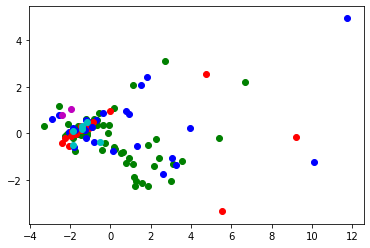

In [29]:
'''For 2d Implementations'''

from matplotlib import pyplot as plt
plt.scatter(labeled_prin_comp['Habilitador'][:,0], labeled_prin_comp['Habilitador'][:,1],color='g')
plt.scatter(labeled_prin_comp['Articulador'][:,0], labeled_prin_comp['Articulador'][:,1],color='b')
plt.scatter(labeled_prin_comp['Vinculador'][:,0], labeled_prin_comp['Vinculador'][:,1],color='r')
plt.scatter(labeled_prin_comp['Generador de conocimiento'][:,0], labeled_prin_comp['Generador de conocimiento'][:,1],color='b')
plt.scatter(labeled_prin_comp['Promotor'][:,0], labeled_prin_comp['Promotor'][:,1],color='m')
plt.scatter(labeled_prin_comp['Comunidad'][:,0], labeled_prin_comp['Comunidad'][:,1],color='c')

plt.show()

In [30]:
''' For 3d Implementations'''
ax = fig.add_subplot(111, projection='3d')
ax.scatter(labeled_prin_comp['Habilitador'][:,0], labeled_prin_comp['Habilitador'][:,1],labeled_prin_comp['Habilitador'][:,2],color='g')
ax.scatter(labeled_prin_comp['Articulador'][:,0], labeled_prin_comp['Articulador'][:,1],labeled_prin_comp['Articulador'][:,2],color='b')
ax.scatter(labeled_prin_comp['Vinculador'][:,0], labeled_prin_comp['Vinculador'][:,1],labeled_prin_comp['Vinculador'][:,2],color='r')
ax.scatter(labeled_prin_comp['Generador de conocimiento'][:,0], labeled_prin_comp['Generador de conocimiento'][:,1],labeled_prin_comp['Generador de conocimiento'][:,2],color='b')
ax.scatter(labeled_prin_comp['Promotor'][:,0], labeled_prin_comp['Promotor'][:,1],labeled_prin_comp['Promotor'][:,2],color='m')
ax.scatter(labeled_prin_comp['Comunidad'][:,0], labeled_prin_comp['Comunidad'][:,1],labeled_prin_comp['Comunidad'][:,2],color='c')

plt.show()

NameError: name 'fig' is not defined

In [31]:
import seaborn as sns

sns.lmplot(x='principal component 1', y='principal component 2', data=prin_comp_df)

NameError: name 'prin_comp_df' is not defined

In [32]:
attr_mat_df=pd.read_csv('Attribute Mixing Matrices.csv')

rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

attr_mat_df

FileNotFoundError: [Errno 2] File Attribute Mixing Matrices.csv does not exist: 'Attribute Mixing Matrices.csv'

In [33]:
list1=list(ieco_df.keys())
list2=list(attr_mat_df.keys())

list2.remove('Ciudad')

positive_pairs=[]
negative_pairs=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,key1,key2,attr_mat_df)
        if sig==True:
            if corr>0:
                positive_pairs.append((key1,key2))
            else:
                negative_pairs.append((key1,key2))

NameError: name 'attr_mat_df' is not defined

In [34]:
for keys in positive_pairs:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_df)

NameError: name 'attr_mat_df' is not defined

In [35]:
for keys in negative_pairs:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_df)

NameError: name 'attr_mat_df' is not defined

In [36]:
attr_mat_undir_df=pd.read_csv('Attribute Mixing Matrices Undirected.csv')

rol_map_esp={'Generador de conocimiento':0,'Habilitador':1,'Promotor':2,
             'Vinculador':3,'Articulador':4,'Comunidad':5}

attr_mat_undir_df

FileNotFoundError: [Errno 2] File Attribute Mixing Matrices Undirected.csv does not exist: 'Attribute Mixing Matrices Undirected.csv'

In [ ]:
list1=list(ieco_df.keys())
list2=list(attr_mat_undir_df.keys())

list2.remove('Ciudad')

positive_pairs_und=[]
negative_pairs_und=[]

for key1 in list1:
    for key2 in list2:
        sig,corr=significant_corr(ieco_grf_df,key1,key2,attr_mat_undir_df)
        if sig==True:
            if corr>0:
                positive_pairs_und.append((key1,key2))
            else:
                negative_pairs_und.append((key1,key2))

In [37]:
for keys in positive_pairs_und:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_undir_df)

NameError: name 'positive_pairs_und' is not defined

In [38]:
for keys in negative_pairs_und:
    print_significant_corr(ieco_grf_df,keys[0],keys[1],attr_mat_undir_df)

NameError: name 'negative_pairs_und' is not defined

In [41]:
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def lin_reg_p_val(reg,X,y):
    sse = np.sum((reg.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    if isinstance(sse, float):
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
    else:
        se = np.array([np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X)))) for i in range(sse.shape[0])])
    t = reg.coef_ / se
    p = 2 * (1 - stats.t.cdf(np.abs(t), y.shape[0] - X.shape[1]))
    return p

In [42]:
ieco_key_list=list(ieco_df.keys())
ieco_key_list.remove('Unnamed: 0')
ieco_key_list.remove('4 Comparative Advantage')
ieco_key_list.remove('5 Impact')

ieco_key_predictors=['4 Comparative Advantage','5 Impact']

grf_key_list=list(grf_df.keys())
grf_key_list.remove('Ciudad')
grf_key_list.remove('País')

for key1 in ieco_key_list:
    for key2 in ieco_key_list:
        if key1 != key2:
            for key3 in ieco_key_list:
                if key3 !=key1 and key3 !=key2:
                    for predict in ieco_key_predictors:
                        X=np.concatenate([ieco_df[key1].to_numpy(),ieco_df[key2].to_numpy(),ieco_df[key3].to_numpy()],axis=0)
                        X=X.reshape(6,3)
                        y=ieco_df[predict].to_numpy()
                        reg=LinearRegression().fit(X,y)
                        p=lin_reg_p_val(reg,X,y)
                        if p[0][0]<.05 and p[0][1]<.05 and p[0][2]<.05 and reg.score(X,y)>.9:
                            print(key1,key2,key3,predict)
                            print('Regression Score: ' + str(reg.score(X,y)) + ' p-value: ' + str(p) )
                            print('Regression Coefficients: ' + str(reg.coef_) )
                            print('')


1 Foundational Institutions 2.01 I-Human Capital 2.04 I-Demand 4 Comparative Advantage
Regression Score: 0.9574594595349746 p-value: [[0.03944762 0.00253107 0.01373074]]
Regression Coefficients: [-0.29351017 -0.43077286  0.44795794]

1 Foundational Institutions 2.04 I-Demand 2.03 I-Infrastructure 4 Comparative Advantage
Regression Score: 0.9751072773597098 p-value: [[0.00802947 0.00088118 0.01136519]]
Regression Coefficients: [-0.42969449 -0.62852606  0.37539375]

1 Foundational Institutions 2.04 I-Demand 3.04 E-Demand 4 Comparative Advantage
Regression Score: 0.958332490917443 p-value: [[0.03268003 0.00269485 0.01331291]]
Regression Coefficients: [-0.26530056 -0.6284401   0.323059  ]

1 Foundational Institutions 2.05 I-Culture & Incentives 2.01 I-Human Capital 4 Comparative Advantage
Regression Score: 0.9965609605241845 p-value: [[1.05351807e-04 9.96403064e-05 1.10557839e-03]]
Regression Coefficients: [ 0.42041191 -0.26695073 -0.12155869]

1 Foundational Institutions 2.05 I-Culture & 

2.03 I-Infrastructure 3.05 E-Culture & Incentives 2.04 I-Demand 4 Comparative Advantage
Regression Score: 0.9788338201002107 p-value: [[0.00143671 0.00351594 0.01624388]]
Regression Coefficients: [ 0.64238663 -0.34564324  0.17472818]

2.03 I-Infrastructure 3.05 E-Culture & Incentives 3.01 E-Human Capital 4 Comparative Advantage
Regression Score: 0.9911948384524794 p-value: [[0.00010889 0.0011178  0.00378394]]
Regression Coefficients: [ 1.03367843 -0.34818991  0.17283059]

2.03 I-Infrastructure 3.05 E-Culture & Incentives 3.02 E-Funding 4 Comparative Advantage
Regression Score: 0.9682801229874924 p-value: [[0.02830971 0.0048689  0.02871164]]
Regression Coefficients: [ 0.26339563 -0.33198238  0.18775459]

2.04 I-Demand 1 Foundational Institutions 2.03 I-Infrastructure 4 Comparative Advantage
Regression Score: 0.9419099403712877 p-value: [[0.00728018 0.00280462 0.0056779 ]]
Regression Coefficients: [-0.67947363 -0.64772071  0.73284627]

2.04 I-Demand 1 Foundational Institutions 3.02 E-Fun

3.01 E-Human Capital 2.05 I-Culture & Incentives 2.02 I-Funding 5 Impact
Regression Score: 0.9920519169825057 p-value: [[0.0022741  0.00084216 0.00151397]]
Regression Coefficients: [ 0.21245276 -0.20329001 -0.11211114]

3.01 E-Human Capital 2.05 I-Culture & Incentives 3.03 E-Infrastructure 5 Impact
Regression Score: 0.9422605173466134 p-value: [[0.00041277 0.003171   0.00244405]]
Regression Coefficients: [ 0.95984025 -0.32132672 -0.2399123 ]

3.01 E-Human Capital 2.05 I-Culture & Incentives 3.04 E-Demand 5 Impact
Regression Score: 0.9841660534186125 p-value: [[0.00060704 0.00113002 0.00172463]]
Regression Coefficients: [ 0.41606365 -0.24088759 -0.14458617]

3.01 E-Human Capital 2.05 I-Culture & Incentives 3.05 E-Culture & Incentives 5 Impact
Regression Score: 0.9010699382171384 p-value: [[0.01302407 0.01443635 0.03563607]]
Regression Coefficients: [ 0.35376007 -0.23768816 -0.11368164]

3.01 E-Human Capital 3.02 E-Funding 2.02 I-Funding 5 Impact
Regression Score: 0.9975505397906438 p-va

3.03 E-Infrastructure 3.02 E-Funding 2.04 I-Demand 4 Comparative Advantage
Regression Score: 0.9985610987981807 p-value: [[2.53467073e-04 3.36764185e-05 5.33873805e-05]]
Regression Coefficients: [-0.4325579  -0.47638031  0.75955384]

3.03 E-Infrastructure 3.02 E-Funding 3.04 E-Demand 4 Comparative Advantage
Regression Score: 0.9934796533649639 p-value: [[0.04554577 0.00041007 0.00055624]]
Regression Coefficients: [-0.1024637  -0.47758225  0.49237358]

3.03 E-Infrastructure 3.05 E-Culture & Incentives 2.03 I-Infrastructure 4 Comparative Advantage
Regression Score: 0.9712597863860026 p-value: [[0.0027196  0.00202906 0.03589403]]
Regression Coefficients: [ 0.64582467 -0.4513118   0.16877147]

3.03 E-Infrastructure 3.05 E-Culture & Incentives 2.04 I-Demand 4 Comparative Advantage
Regression Score: 0.9722488446763496 p-value: [[0.00299142 0.00278977 0.0333756 ]]
Regression Coefficients: [ 0.61228366 -0.44574834  0.15670663]

3.03 E-Infrastructure 3.05 E-Culture & Incentives 3.01 E-Human Cap

1 Foundational Institutions 2.02 I-Funding 4 Comparative Advantage
Regression Score: 0.8760073249285918 p-value: [[0.01343502 0.00319696]]
Regression Coefficients: [-0.36795922  0.59844681] Intercept: 2.2490030178275653


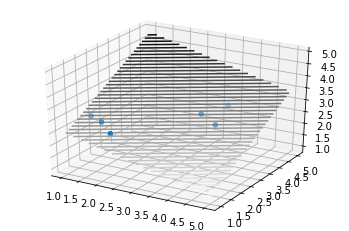

1 Foundational Institutions 2.04 I-Demand 4 Comparative Advantage
Regression Score: 0.9034882009953756 p-value: [[0.014796   0.00461447]]
Regression Coefficients: [-0.57197353  0.89280334] Intercept: 2.013796759131127


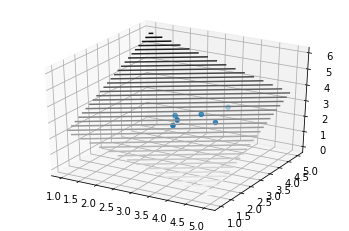

2.01 I-Human Capital 2.03 I-Infrastructure 5 Impact
Regression Score: 0.8193705182262778 p-value: [[0.00335405 0.02322692]]
Regression Coefficients: [ 0.49829976 -0.325828  ] Intercept: 1.4971920429393184


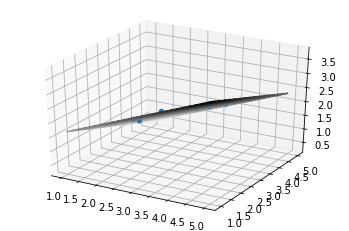

2.01 I-Human Capital 2.05 I-Culture & Incentives 5 Impact
Regression Score: 0.9207897687672386 p-value: [[2.65906882e-05 4.05732704e-05]]
Regression Coefficients: [0.35862972 0.43941448] Intercept: 0.3469286915107388


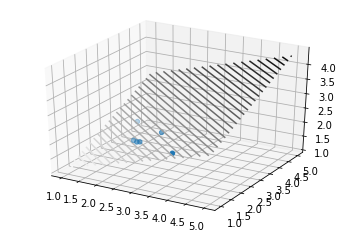

2.02 I-Funding 1 Foundational Institutions 4 Comparative Advantage
Regression Score: 0.948857421438137 p-value: [[0.00217455 0.00049082]]
Regression Coefficients: [ 0.39246891 -0.6292434 ] Intercept: 3.323386968946955


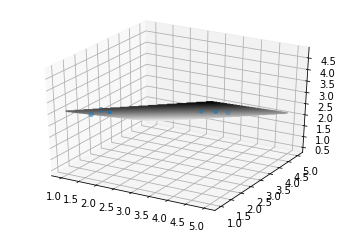

2.04 I-Demand 1 Foundational Institutions 4 Comparative Advantage
Regression Score: 0.8743609182517296 p-value: [[0.03125506 0.00856859]]
Regression Coefficients: [ 0.51736144 -0.85666311] Intercept: 3.622728188256654


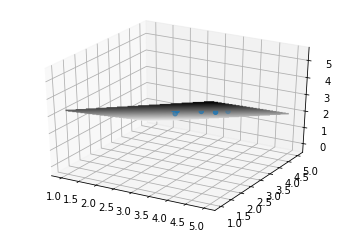

2.05 I-Culture & Incentives 1 Foundational Institutions 4 Comparative Advantage
Regression Score: 0.8768570972508145 p-value: [[0.03003925 0.00433588]]
Regression Coefficients: [ 0.10780147 -0.22947497] Intercept: 3.0356104955441716


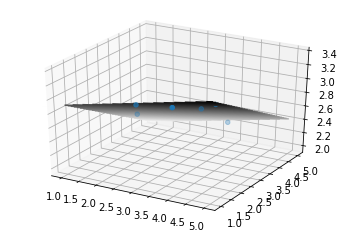

2.05 I-Culture & Incentives 2.01 I-Human Capital 4 Comparative Advantage
Regression Score: 0.8044104098362945 p-value: [[0.02019329 0.00055172]]
Regression Coefficients: [-0.15378054 -0.56369693] Intercept: 4.305271534557415


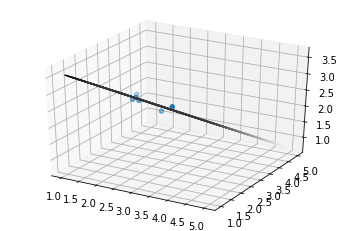

2.05 I-Culture & Incentives 3.01 E-Human Capital 4 Comparative Advantage
Regression Score: 0.8155081056707553 p-value: [[0.04675269 0.00810444]]
Regression Coefficients: [ 0.10982991 -0.23531627] Intercept: 3.0205750153785753


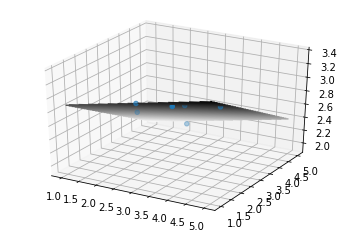

3.01 E-Human Capital 2.02 I-Funding 4 Comparative Advantage
Regression Score: 0.8811180405504193 p-value: [[0.00933919 0.00140927]]
Regression Coefficients: [-0.31499457  0.58705617] Intercept: 2.189377714659


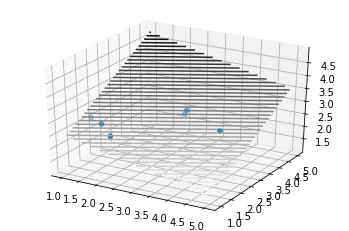

3.01 E-Human Capital 2.03 I-Infrastructure 4 Comparative Advantage
Regression Score: 0.8098278471485052 p-value: [[0.02516929 0.04466569]]
Regression Coefficients: [-0.3951867  -0.36480113] Intercept: 5.363512809571261


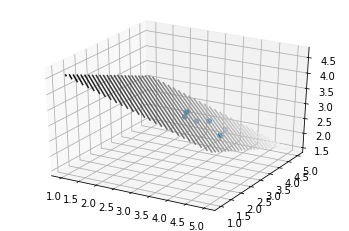

3.01 E-Human Capital 2.04 I-Demand 4 Comparative Advantage
Regression Score: 0.8599935971542844 p-value: [[0.03188059 0.00079607]]
Regression Coefficients: [-0.32271692  1.0419281 ] Intercept: 0.8375767719990768


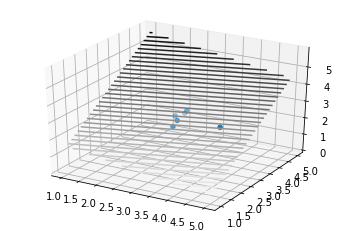

In [43]:
for key1 in ieco_key_list:
    for key2 in ieco_key_list:
        if key1 != key2:
            for predict in ieco_key_predictors:
                X=np.concatenate([ieco_df[key1].to_numpy(),ieco_df[key2].to_numpy()],axis=0)
                X=X.reshape(6,2)
                y=ieco_df[predict].to_numpy()
                reg=LinearRegression().fit(X,y)
                p=lin_reg_p_val(reg,X,y)
                if p[0][0]<.05 and p[0][1]<.05 and reg.score(X,y)>.8:
                    print(key1,key2,predict)
                    print('Regression Score: ' + str(reg.score(X,y)) + ' p-value: ' + str(p) )
                    print('Regression Coefficients: ' + str(reg.coef_) + ' Intercept: ' + str(reg.intercept_))
                    ax=plt.axes(projection='3d')
                    a = np.linspace(1, 5, 30)
                    b = np.linspace(1, 5, 30)
                    A,B=np.meshgrid(a,b)
                    C=A*reg.coef_[0]+B*reg.coef_[1]+reg.intercept_
                    ax.scatter3D(X[:,0],X[:,1],y,cmap='Greens')
                    ax.contour3D(A,B,C,50,cmap='binary')
                    plt.show()